In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
ls

In [14]:
df_temp = pd.read_csv('GlobalLandTemperaturesByCountry.csv', encoding='UTF-8')
df_temp.head()

In [16]:
df_temp.shape

In [29]:
df_temp.value_counts()

In [22]:
df_temp.nunique()

In [20]:
df_temp.dtypes

In [ ]:
df_temp.corr()

In [17]:
df_temp.info()

In [34]:
df_temp['Country'].unique()

In [312]:
df_temp['year'] = pd.to_datetime(df_temp['dt'])
df_temp['year']

2715     1970-02-01
2716     1970-03-01
2717     1970-04-01
2718     1970-05-01
2719     1970-06-01
            ...    
577457   2013-05-01
577458   2013-06-01
577459   2013-07-01
577460   2013-08-01
577461   2013-09-01
Name: year, Length: 127332, dtype: datetime64[ns]

In [311]:
idx = df_temp['year'] > pd.to_datetime('1970-01-01')
df_temp = df_temp[idx]
df_temp.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year
2715,1970-02-01,-10.835,0.478,Åland,1970-02-01
2716,1970-03-01,-1.583,0.608,Åland,1970-03-01
2717,1970-04-01,0.493,0.463,Åland,1970-04-01
2718,1970-05-01,6.939,0.565,Åland,1970-05-01
2719,1970-06-01,14.252,0.676,Åland,1970-06-01


In [48]:
df_t_avg = df_temp.groupby(['Country', pd.Grouper(key='year', freq ='1Y')]).agg({'AverageTemperature':[np.mean, np.median]})
df_t_avg

In [52]:
df_t_avg.xs('Mexico')['AverageTemperature'].plot()

In [55]:
df_t_med = df_t_avg['AverageTemperature'][['median']].reset_index()
df_t_med

In [57]:
df_t_med['date'] = df_t_med['year']
df_t_med['date']

In [59]:
df_t_med.rename(columns={'median': 'temperature'}, inplace=True)
df_t_med.head()

In [65]:
df_t_pivot = df_t_med.pivot_table(values='temperature', index='date', columns='Country')
df_t_pivot.head()

In [66]:
df_t_pivot.boxplot()

In [79]:
df_t_pivot.T.sample(10).T.boxplot(rot=45)

In [84]:
ls

In [87]:
df_agri = pd.read_csv('API_AG.LND.AGRI.K2_DS2_en_csv_v2_716226.csv', header =2)
df_fore = pd.read_csv('API_AG.LND.FRST.K2_DS2_en_csv_v2_716262.csv', header =2)
df_elec = pd.read_csv('API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2_715482.csv', header =2)
df_co2e = pd.read_csv('API_EN.ATM.CO2E.KT_DS2_en_csv_v2_713263.csv', header = 2)
df_popu = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_713131.csv', header = 2)

In [122]:
df_agri

In [227]:
fechas2 = pd.date_range(start='1970', end='2015', freq='Y')
fechas2 =fechas2.map(lambda x: str(x.year))
fechas2

In [107]:
range(1971,2015)
map(str, range(1971,2015))
cols = ['Country Name', 'Country Code'] + list(map(str, range(1971,2015)))
cols[:5]

In [114]:
df_agri.loc[:,cols].melt(id_vars=['Country Name', 'Country Code']).rename(
columns={'variable': 'date',
'Country Name': 'Country',
'Country Code': 'name',
'value': 'agriculture'})

In [116]:
def fun_formato(df, col = 'agriculture'): #formateamos todos los data frames a un mismo formato parecido al anterior de las temperaturas.
    return df.loc[:,cols].melt(id_vars=['Country Name', 'Country Code']).rename(
    columns={'variable': 'date',
    'Country Name': 'Country',
    'Country Code': 'name',
    'value': col})

In [123]:
df_agri = fun_formato(df_agri, col = 'agriculture')
df_fore = fun_formato(df_fore, col = 'forest')
df_elec = fun_formato(df_elec, col = 'electricprod')
df_co2e = fun_formato(df_co2e, col = 'co2')
df_popu = fun_formato(df_popu, col = 'population')

In [132]:
df_popu.info()

In [133]:
df_popu['date'] = df_popu['date'].astype(float)
df_fore['date'] = df_fore['date'].astype(float)
df_elec['date'] = df_elec['date'].astype(float)
df_co2e['date'] = df_co2e['date'].astype(float)
df_agri['date'] = df_agri['date'].astype(float)

In [313]:
df_t_med.dtypes

Country                object
year           datetime64[ns]
temperature           float64
date           datetime64[ns]
dtype: object

In [314]:
df_t_med['date']

0       1970-12-31
1       1971-12-31
2       1972-12-31
3       1973-12-31
4       1974-12-31
           ...    
10687   2009-12-31
10688   2010-12-31
10689   2011-12-31
10690   2012-12-31
10691   2013-12-31
Name: date, Length: 10692, dtype: datetime64[ns]

In [315]:
df_t_med['date'] = pd.DatetimeIndex(df_t_med['date']).year

In [320]:
df_t_med['date'].astype(float)

0        1970.0
1        1971.0
2        1972.0
3        1973.0
4        1974.0
          ...  
10687    2009.0
10688    2010.0
10689    2011.0
10690    2012.0
10691    2013.0
Name: date, Length: 10692, dtype: float64

In [321]:
df_t_med.head(2)

,Country,year,temperature,date
0,Afghanistan,1970-12-31,16.199,1970
1,Afghanistan,1971-12-31,14.934,1971


In [329]:
df_merge = pd.merge(df_t_med[['Country', 'temperature', 'date']], df_popu, how = 'inner', on =['Country', 'date'])

In [330]:
df_merge = pd.merge(df_merge, df_co2e, how = 'inner', on =['Country', 'name', 'date'])

In [331]:
df_merge = pd.merge(df_merge, df_elec, how = 'inner', on =['Country', 'name', 'date'])

In [332]:
df_merge = pd.merge(df_merge, df_agri, how = 'inner', on =['Country', 'name', 'date'])

In [333]:
df_merge = pd.merge(df_merge, df_fore, how = 'inner', on =['Country', 'name', 'date'])

In [346]:
df_merge

,Country,temperature,date,name,population,co2,electricprod,agriculture,forest
0,Afghanistan,14.9,1971,AFG,"11,475,445.0","1,895.8",NaN,"380,360.0",NaN
1,Afghanistan,13.9,1972,AFG,"11,791,215.0","1,532.8",NaN,"380,460.0",NaN
2,Afghanistan,14.9,1973,AFG,"12,108,963.0","1,639.1",NaN,"380,480.0",NaN
3,Afghanistan,13.6,1974,AFG,"12,412,950.0","1,917.8",NaN,"380,480.0",NaN
4,Afghanistan,13.5,1975,AFG,"12,689,160.0","2,126.9",NaN,"380,480.0",NaN
...,...,...,...,...,...,...,...,...,...
7219,Zimbabwe,22.5,2009,ZWE,"12,526,968.0","5,603.2",585.5,"163,000.0","159,510.0"
7220,Zimbabwe,23.3,2010,ZWE,"12,697,723.0","7,777.7",606.6,"162,000.0","156,240.0"
7221,Zimbabwe,22.9,2011,ZWE,"12,894,316.0","9,563.5",636.2,"164,000.0","153,116.0"
7222,Zimbabwe,23.0,2012,ZWE,"13,115,131.0","7,792.4",608.8,"162,000.0","149,992.0"


In [337]:
df_climate = df_merge.dropna()

In [392]:
df_climate.groupby(['Country'])['co2'].median().sort_values(ascending=False)

Country
North America   5,886,299.6
United States   5,382,123.7
China           3,668,917.8
Japan           1,202,082.9
India           1,047,705.9
                    ...    
Haiti               1,652.0
Mozambique          1,584.1
Togo                1,285.3
Niger                 784.7
Eritrea               614.2
Name: co2, Length: 120, dtype: float64

In [347]:
pd.set_option('display.float_format', '{:,.1f}'.format)

In [352]:
first_10 = df_climate.groupby('Country')['co2'].median().sort_values(ascending=False).head(10).index
first_10

Index(['North America', 'United States', 'China', 'Japan', 'India', 'Germany',
       'United Kingdom', 'Canada', 'Italy', 'Mexico'],
      dtype='object', name='Country')

In [353]:
df_max_co2 = df_climate[df_climate['Country'].isin(['North America', 'United States', 'China', 'Japan', 'India', 'Germany',
       'United Kingdom', 'Canada', 'Italy', 'Mexico'])]
df_max_co2

,Country,temperature,date,name,population,co2,electricprod,agriculture,forest
1266,Canada,-4.6,1990,CAN,"27,691,138.0","435,181.2","16,167.4","677,680.0","3,482,730.0"
1267,Canada,-4.2,1991,CAN,"28,037,420.0","426,780.1","16,181.6","677,530.0","3,482,259.1"
1268,Canada,-5.0,1992,CAN,"28,371,264.0","440,978.8","16,164.4","678,140.0","3,481,788.1"
1269,Canada,-4.0,1993,CAN,"28,684,764.0","445,580.8","16,320.1","678,740.0","3,481,316.9"
1270,Canada,-3.4,1994,CAN,"29,000,663.0","456,849.5","16,388.3","679,340.0","3,480,845.9"
...,...,...,...,...,...,...,...,...,...
7004,United States,8.4,2009,USA,"306,771,529.0","5,263,505.5","12,913.7","4,099,606.9","3,079,274.1"
7005,United States,10.2,2010,USA,"309,326,085.0","5,395,532.1","13,394.9","4,084,261.9","3,087,200.0"
7006,United States,9.5,2011,USA,"311,580,009.0","5,289,680.5","13,246.0","4,046,693.1","3,089,950.0"
7007,United States,9.9,2012,USA,"313,874,218.0","5,119,436.4","12,964.3","4,087,065.0","3,092,700.0"


<AxesSubplot:xlabel='population', ylabel='co2'>

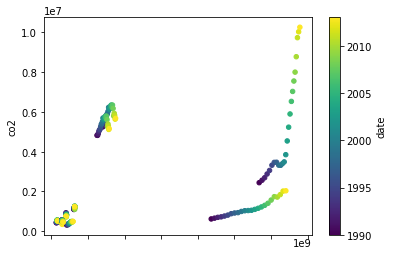

In [354]:
df_max_co2.set_index('Country').plot.scatter(
    x='population',
    y='co2',
    c='date',
    colormap='viridis')

In [355]:
df_climate.corr() #permite calcular correlacion de las variables.

,temperature,date,population,co2,electricprod,agriculture,forest
temperature,1.0,0.0,-0.0,-0.2,-0.4,-0.1,-0.1
date,0.0,1.0,0.0,0.0,0.1,-0.0,-0.0
population,-0.0,0.0,1.0,0.6,-0.0,0.6,0.4
co2,-0.2,0.0,0.6,1.0,0.2,0.8,0.7
electricprod,-0.4,0.1,-0.0,0.2,1.0,0.1,0.2
agriculture,-0.1,-0.0,0.6,0.8,0.1,1.0,0.7
forest,-0.1,-0.0,0.4,0.7,0.2,0.7,1.0


In [356]:
import seaborn as sns

<AxesSubplot:>

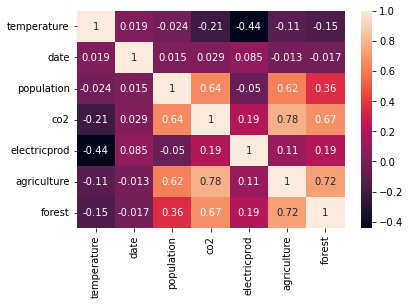

In [358]:
sns.heatmap(df_climate.corr(), annot=True)

In [360]:
df_med = df_climate.groupby('date').median()
df_med.head()

,temperature,population,co2,electricprod,agriculture,forest
date,,,,,,
1990,22.7,"10,213,863.0","31,363.9","1,114.7","90,195.0","54,005.0"
1991,22.4,"10,346,663.5","27,343.0","1,072.5","91,870.0","60,307.5"
1992,19.9,"9,188,305.5","26,420.7","1,451.8","89,700.0","45,621.0"
1993,20.6,"9,951,683.5","28,267.1","1,520.3","89,890.0","44,579.0"
1994,20.7,"9,991,525.0","29,640.4","1,576.8","89,150.0","42,572.0"


<AxesSubplot:>

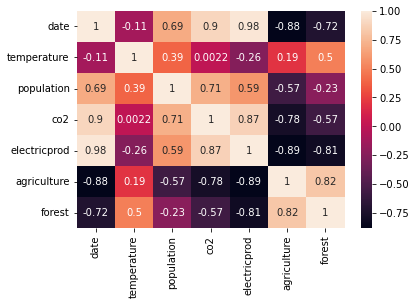

In [361]:
sns.heatmap(df_med.reset_index().corr(),annot=True)

In [362]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='date', ylabel='date'>,
        <AxesSubplot:xlabel='temperature', ylabel='date'>,
        <AxesSubplot:xlabel='population', ylabel='date'>,
        <AxesSubplot:xlabel='co2', ylabel='date'>,
        <AxesSubplot:xlabel='electricprod', ylabel='date'>,
        <AxesSubplot:xlabel='agriculture', ylabel='date'>,
        <AxesSubplot:xlabel='forest', ylabel='date'>],
       [<AxesSubplot:xlabel='date', ylabel='temperature'>,
        <AxesSubplot:xlabel='temperature', ylabel='temperature'>,
        <AxesSubplot:xlabel='population', ylabel='temperature'>,
        <AxesSubplot:xlabel='co2', ylabel='temperature'>,
        <AxesSubplot:xlabel='electricprod', ylabel='temperature'>,
        <AxesSubplot:xlabel='agriculture', ylabel='temperature'>,
        <AxesSubplot:xlabel='forest', ylabel='temperature'>],
       [<AxesSubplot:xlabel='date', ylabel='population'>,
        <AxesSubplot:xlabel='temperature', ylabel='population'>,
        <AxesSubplot:xlabel='population'

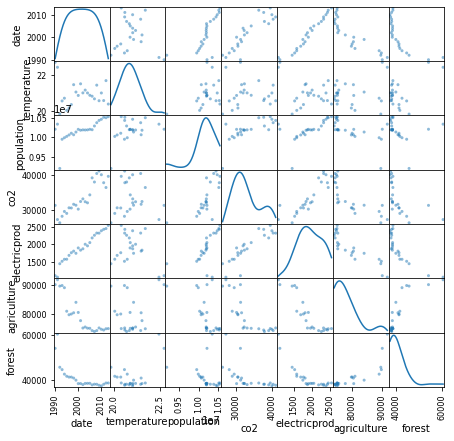

In [365]:
scatter_matrix(df_med.reset_index(), diagonal='kde', figsize=(7,7))

In [366]:
from pandas.plotting import parallel_coordinates

In [369]:
df_samerica = df_climate[
    df_climate['Country'].isin(['Colombia','Argentina','Bolivia','Mexico','Peru','Chile'])
    ][['Country','temperature','co2','agriculture','forest']]

<AxesSubplot:>

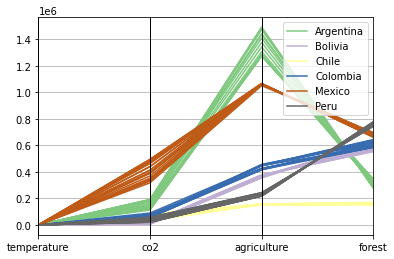

In [375]:
parallel_coordinates(df_samerica, 'Country', colormap = 'Accent')

Pairplot es una buena alternativa de scatter_matrix. Está en la librería seaborn

<NA>

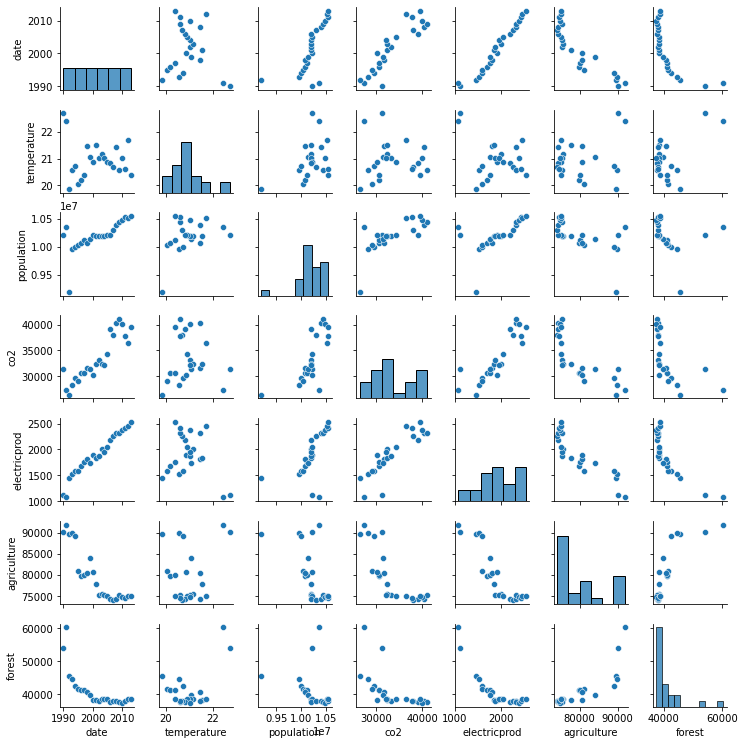

In [384]:
sns.pairplot(df_med.reset_index(), height= 1.5)